Title : Data Wrangling II

Createan“Academicperformance”datasetofstudentsand
 perform the following operations using Python. 
1. Scan all variables for missing values and inconsistencies. If 
there are missing values and/or inconsistencies, use any of 
the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, 
use any of the suitable techniques to deal with them. 
3. Apply data transformations on at least one of the variables. 
The purpose of this transformation should be one of the 
following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation 
into a linear one, or to decrease the skewness and convert the 
distribution into a normal distribution. 
Reason and document your approach properly.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
students=pd.read_csv("StudentsPerformance.csv")

In [3]:
# Get head datas
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape = no of rows, no of columns
students.shape

(1000, 8)

In [5]:
# Summary
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Count of null values
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Changing column names
students=students.rename(columns={'math score':'DSBDAL','reading score':'LP2','writing score':'WTL'})

In [12]:
# Changing 4 values of LP2 and 6 values of WTL to null
students.loc[1:4,'LP2']=np.nan
students.loc[14:19,'WTL']=np.nan

In [13]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
DSBDAL                         0
LP2                            4
WTL                            6
dtype: int64

In [14]:
# Placing 0's at Null values 
students.fillna(0,inplace=True)

In [15]:
# Replacing Null values by mean
students['WTL'] = students['WTL'].fillna(students['WTL'].mean())

In [17]:
# Skewness of all numeric columns
students.skew(numeric_only=True)

DSBDAL   -0.278935
LP2      -0.552158
WTL      -0.627177
dtype: float64

In [21]:
# IQR method to find outliers of DBBDAL
Q1 = students['DSBDAL'].quantile(0.25)
Q3 = students['DSBDAL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
DSBDAL_outliers = (students['DSBDAL'] < lower_bound) | (students['DSBDAL'] > upper_bound)
DSBDAL_outliers

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: DSBDAL, Length: 1000, dtype: bool

In [22]:
 DSBDAL_outliers.sum()

np.int64(8)

In [24]:
# Outliers of LP2
Q1 = students['LP2'].quantile(0.25)
Q3 = students['LP2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
LP2_outliers = (students['LP2'] < lower_bound) | (students['LP2'] > upper_bound)
LP2_outliers.sum()

np.int64(10)

In [25]:
# Outliers of WTL
Q1 = students['WTL'].quantile(0.25)
Q3 = students['WTL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
WTL_outliers = (students['WTL'] < lower_bound) | (students['WTL'] > upper_bound)
WTL_outliers.sum()

np.int64(11)

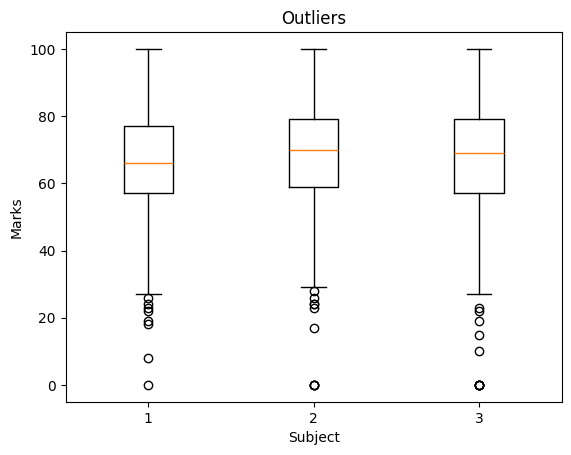

In [26]:
# Boxploting for outliers
import matplotlib.pyplot as plt
plt.boxplot([students['DSBDAL'],students['LP2'],students['WTL']])
plt.title('Outliers')
plt.xlabel('Subject')
plt.ylabel('Marks')
plt.show()

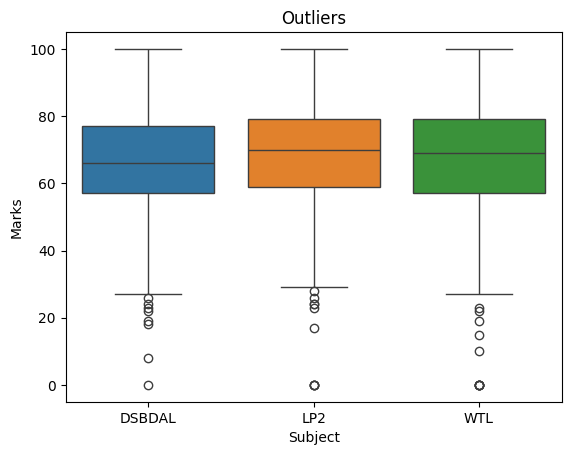

In [27]:
# sns to box plot the values that are out side the bars are the outliers
import seaborn as sns
sns.boxplot(students)
plt.title('Outliers')
plt.xlabel('Subject')
plt.ylabel('Marks')
plt.show()

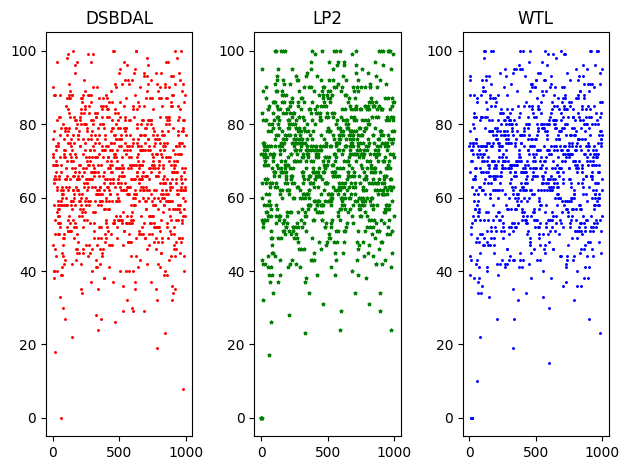

In [30]:
# Subplots for outliers
plt.subplot(1,3,1)
plt.scatter(students.index,students['DSBDAL'],marker='.',color='red',s=5)
plt.title('DSBDAL')
plt.subplot(1,3,2)
plt.scatter(students.index,students['LP2'],marker='*',color='green',s=5)
plt.title('LP2') 
plt.subplot(1,3,3)
plt.scatter(students.index,students['WTL'],marker='.',color='blue',s=5)
plt.title('WTL') 
plt.tight_layout()
plt.show()

In [33]:
# Z-score method : outliers where Z-Score > 3 or < -3
from scipy.stats import zscore
students['DSBDAL_ZScore'] = zscore(students['DSBDAL'])
DSBDAL_zscore = students[students['DSBDAL_ZScore'].abs() > 3]
print("Outliers based on Z-score:", len(DSBDAL_zscore))

Outliers based on Z-score: 4


In [34]:
# Replacing outliers with median of the column
students.loc[DSBDAL_outliers, 'DSBDAL'] = students['DSBDAL'].median()

In [35]:
students.loc[LP2_outliers, 'LP2'] = students['LP2'].mean()

In [36]:
students.loc[WTL_outliers, 'WTL'] = students['WTL'].median()

In [37]:
students.skew(numeric_only=True)

DSBDAL           -0.068786
LP2              -0.138868
WTL              -0.156380
DSBDAL_Z-Score   -0.278935
DSBDAL_ZScore    -0.278935
dtype: float64

In [38]:
# min-max normalization
minV=students['WTL'].min()
maxV=students['WTL'].max()
students['Normal_WTL']=((students['WTL']-minV)/(maxV-minV)).round(2)

In [39]:
students["Total"]=students["DSBDAL"]+students["LP2"]+students["WTL"]

In [42]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DSBDAL,LP2,WTL,DSBDAL_ZScore,Normal_WTL,Total
0,female,group B,bachelor's degree,standard,none,72,72.000,74.0,0.390024,0.64,218.000
1,female,group C,some college,standard,completed,69,68.849,88.0,0.192076,0.84,225.849
2,female,group B,master's degree,standard,none,90,68.849,93.0,1.577711,0.90,251.849
3,male,group A,associate's degree,free/reduced,none,47,68.849,44.0,-1.259543,0.23,159.849
4,male,group C,some college,standard,none,76,68.849,75.0,0.653954,0.66,219.849
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.000,95.0,1.445746,0.93,282.000
996,male,group C,high school,free/reduced,none,62,55.000,55.0,-0.269803,0.38,172.000
997,female,group C,high school,free/reduced,completed,59,71.000,65.0,-0.467751,0.52,195.000
998,female,group D,some college,standard,completed,68,78.000,77.0,0.126093,0.68,223.000


In [43]:
students['Total'] = students['Total'].astype(int)

In [44]:
#Scaling total score to out of 30 marks
students["Total"]=students["Total"]/10
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DSBDAL,LP2,WTL,DSBDAL_ZScore,Normal_WTL,Total
0,female,group B,bachelor's degree,standard,none,72,72.000,74.0,0.390024,0.64,21.8
1,female,group C,some college,standard,completed,69,68.849,88.0,0.192076,0.84,22.5
2,female,group B,master's degree,standard,none,90,68.849,93.0,1.577711,0.90,25.1
3,male,group A,associate's degree,free/reduced,none,47,68.849,44.0,-1.259543,0.23,15.9
4,male,group C,some college,standard,none,76,68.849,75.0,0.653954,0.66,21.9
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.000,95.0,1.445746,0.93,28.2
996,male,group C,high school,free/reduced,none,62,55.000,55.0,-0.269803,0.38,17.2
997,female,group C,high school,free/reduced,completed,59,71.000,65.0,-0.467751,0.52,19.5
998,female,group D,some college,standard,completed,68,78.000,77.0,0.126093,0.68,22.3


In [45]:
# Z-Score Normalization = (x-mean(x))/std(x)
students["WTL"]=((students["WTL"]-students["WTL"].mean())/students["WTL"].std()).round(2)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DSBDAL,LP2,WTL,DSBDAL_ZScore,Normal_WTL,Total
0,female,group B,bachelor's degree,standard,none,72,72.000,0.38,0.390024,0.64,21.8
1,female,group C,some college,standard,completed,69,68.849,1.34,0.192076,0.84,22.5
2,female,group B,master's degree,standard,none,90,68.849,1.68,1.577711,0.90,25.1
3,male,group A,associate's degree,free/reduced,none,47,68.849,-1.66,-1.259543,0.23,15.9
4,male,group C,some college,standard,none,76,68.849,0.45,0.653954,0.66,21.9
